### Author: Jose Miguel Bautista
### Updated: 05/31/2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import *
import time

# Preface: Sorting Problems

Recall the basic sorting problem. 

>**Input:** A sequence of numbers $\{a_1, a_2, ... , a_n\}$.  
**Output:** A permutation, $\{a'_1, a'_2, ..., a'_n\}$ such that $a'_1 \leq a'_2 \leq ... \leq a'_n$

In other words, the rearrangement of numbers going from lowest to highest. 

To be upfront: 99% of the time, you should just use the native sorting method of your programming language to sort things.  
They are guaranteed to work, and likely orders of magnitude faster than any routines you design.  

**But** it is important you know the different sorting algorithms.  
- Sorting is a lot of what computers ultimately do, so sorting is the most studied computer science problem.  
- Many problems require (or at least sped up greatly by) an initial sorting.  
- Many problems that *aren't* about sorting can be framed as a sorting task.  
- There are dozens if not hundreds of sorting algorithms, with more coming out every now and then (many of which are hybrid algorithms).  
Programmers are fundamentally lazy, so *clearly* they made these algorithms for specific reasons and contexts.  
If you understand the base sorting algorithms, you too can understand and adapt to different scenarios.  



# Initial Sorting Algorithms

## Selection Sort
One of the simplest (though inefficient) solutions is selection sort.

In English, the algorithm to selection sort an array is something like
1. Construct 2 subarray: sorted and unsorted. 
1. While the unsorted array is non-empty:
    1. Find the minimum value of the unsorted array.
    1. Add the minimum to the sorted array
    1. Remove the minimum from the unsorted array

In pseudocode, the algorithm to selection sort array a is something like

	DEF selectSort( a ):
		sorted = NULLARRAY( LEN( a ) )
		FOR j in RANGE( LEN( a ) ): 
			sorted[ j ] = MINIMUM( a )
			a.pop( MINIMUM( a ) )
    RETURN  sorted

Demo code for this is shown below.  

Due to the nested for-loop, this is going to be quite slow at $O(n^2)$.  
The problem is that the search for the minimum of the unsorted array is exhaustive, $O(n)$, every single iteration.  
Even if the unsorted subarray shrinks per iteration, we look at the entire subarray every time.  
As in hashing, this is inefficient because we end up recomparing items we have already seen.  

In [2]:
def selectSort(A): 
    # Demo of selection sort
    
    # Uses temp arrays for convenience, but could use index manipulation if desired
    A0 = A.copy()
    Asort = [0]*len(A0)
    #steps = 0
    
    # Iteratively find the minimum of the unsorted array, add to sorted, then remove from unsorted.
    for i in range(len(Asort)): 
        Amin = A0[0]
        for j in range(len(A0)): # Python has min() already, this is just a more explicit loop
            if (A0[j] < Amin):
                Amin = A0[j]
    #        steps += 1
        Asort[i] = Amin
        A0.remove(min(A0))
        
    #print(steps) # sanity check: should be approx (n^2)/2 if incremented in second loop
    return Asort

# Testing code

A = np.random.randint(100, size=20)
A = list(A)

print("Original array:".rjust(15), A)
A = selectSort(A)
print("Sorted array:".rjust(15), A)
print("Is sorted:".rjust(15), all(A[i] <= A[i+1] for i in range(len(A) - 1)))


Original array: [58, 58, 51, 36, 28, 68, 76, 33, 41, 23, 97, 61, 32, 64, 73, 29, 5, 71, 50, 68]
  Sorted array: [5, 23, 28, 29, 32, 33, 36, 41, 50, 51, 58, 58, 61, 64, 68, 68, 71, 73, 76, 97]
     Is sorted: True


## Heapsort

Heapsort is, crudely, nothing but selection sort with a better data structure: heaps.  
*Heaps* are (nearly) complete binary trees that satisfy a heap-property:
- Max Heap: the value of a parent node’s key is larger than all children
- Min Heap: the value of a parent node’s key is smaller than all children

For selection sorting, this is fantastic we know exactly where the minimum/maximum is (it’s the root).  
As long as generating the heap isn't too slow, we can use this instead of raw arrays.  

### Heapsort: Building a Heap
To actually build/implement a heap in the first place, the most natural implementation would be using pointers and as a linked structure.  
But as it happens, the binary structure and heap property allow us to use (partial-order) arrays instead.

<img src="img/06-08_heap.png" style="width: 50em" />

To traverse the tree, note that if a node is assigned to index $i$, its family's indices follow
- Parent: $i \, //\, 2$
- Left Child: $2i$ 
- Right Child: $2i + 1$

So to turn an array into a heap, we just need to make it satisfy the heap property through a *heapify* operation.  
This operation considers a single index, and percolates down the tree swapping nodes until the associated branch has all parents dominate their children.  
I will ask you to fill in code for this in the exercises below (use Cormen if you like).  
The translated pseudocode for this operation is something like
1. Consider index `i` + children a subheap
1. Check for largest among `i` + children
1. If largest is not in index `i`
    1. Swap value in node `i` with the larger child
    1. Call recursively on child index

To heap an $n$-length array, heapify all $n/2$ non-leaf indices (in reverse order).   
Height of tree is clearly `FLOOR(log(n))`, and in principle any element could travel that far, so worst case heap construction *would* be $O(n \log(n))$.  

The catch is that majority of nodes are low level; half of the total nodes are leaves, but there's only one root.  
More precisely: for an $n$-node tree, the last $n/2$ indices will be leaves, the preceeding $n/4$, etc.  
As long as you are heaping from the bottom up (right to left in the array), chances are good the item doesn't move along the height of the tree very much.  

    n.b. This is why Cormen and Python implementation specifically use for-loops going from high to low index. 
    
The amount of time for the percolation procedure is $O(h)$ where $h$ is the height the element travels.  
To build a full heap requires $n/2$ (height $0$) nodes, $n/4$ (height $1$) nodes, all the way to the single root (height $\text{FLOOR}(\log(n))$).  
For any particular array, these node numbers will be upper bounds.  
The total time taken $T(n)$ is their sum 
$$T(n) = \sum_{h=0}^{\text{FLOOR}(\log(n))} \text{CEIL}\left(\frac{n}{2^{h+1}}\right)\times h$$

You should recognize the summation from the dynamic array notebook.  
We will bound it in exactly the same way (set the limit to infinity, ignore floor/ceiling terms, take a geometric series, etc).  
This will ultimately be $O(n)$. 

### Heapsort: Sorting

Say you build a heap from an array in $O(n)$.  
To heapsort the original array: 
1. Take the root of the heap, and add it to the sorted sublist. 
1. Re-heap the 2 sub-heaps back into a single heap (one element smaller). 
1. Repeat the first two steps until the heap is empty. 

Re-heaping (in an array) must be done by replacing the root (index 0).  
For simplicity, this is done by swapping it with the the rightmost leaf, then shrinking the range of considered indices by 1.  
This new root may (read:likely) not satisfy heap property, so percolate it down the heap until it does. 

If we do this $n$ times, and the percolation takes $\log(n)$ time, heapsort is expected to be $O(n\log(n))$.  
Note as well that this will not benefit from the amortized analysis of heap construction.  
Think about why that is the case.  

<details>
<summary>**Click here for reason.</summary>
    
In heap construction, we went with a bottom up method, where the leaves don't move much.  
    
For heapsort, we always pick the root, so the re-heaping acts in a top-down manner and our new root will travel the full height of the tree.  
    
There is effectively no way around this, since the removal of the root always leads to 2 independent sub-heaps.  
    
Regardless of what you pick as the root, there will be $\log(n)$ time taken propagating the changes downward.  
    
Put another way: if I have 2 piles of dirt, the fastest way to make a bigger pile of dirt is to dump one on the other, and the dirt always rolls downhill. 
</details>


### heapq

I should clarify that Python already has heaps implemented in the form of the [heapq](https://docs.python.org/3/library/heapq.html) module.  
You can also just look at the `heapq` [source code](https://github.com/python/cpython/blob/main/Lib/heapq.py) for inspiration.  
Mind that Cormen calls the percolation function "maxHeapify," but in the code, it is `_siftdown` and/or `_siftup`.  
The `heapify` source code function just percolates all the indices of an entire array ("buildMaxHeap" in Cormen).  

I encourage you to use these, particularly `heapify`, `heappush`, and `heappop` for debugging your own implementations in the exercises.  
But for practice, I suggest doing the exercises using just arrays, i.e. without using any of `heapq`.  
When you have a working implementation of your own, do as you please.


In [3]:
# Demo heapq commands from documentation
# Can use these for debugging exercise code.

def heapsort(iterable):
    h = []
    for value in iterable:
        heappush(h, value)
    return [heappop(h) for i in range(len(h))]

A = list(np.random.randint(100, size=10))
print("Original array:".rjust(15), A)
B = A.copy()
heapify(B)
print("Heaped array:".rjust(15), B) 
A = heapsort(A) # will heap A, so no need to use B
print("Sorted array:".rjust(15), A)   

Original array: [86, 54, 55, 63, 67, 79, 63, 0, 9, 73]
  Heaped array: [0, 9, 55, 54, 67, 79, 63, 63, 86, 73]
  Sorted array: [0, 9, 54, 55, 63, 63, 67, 73, 79, 86]


In [4]:
# Exercise heap functions

# Helper functions
def left(i):
    return 2*i

def right(i):
    return 2*i + 1

def parent(i):
    return i//2
    
# FILL THESE IN.
# You may use helper functions, Cormen (160+), and heapq source code

def maxHeapify(A, i): 
    # For input array A and index i, percolate i until it satisfies max-heap
    # Assumes child trees are themselves max-heaps
    
    ### YOUR CODE HERE
    
    
    
    ###
    pass

def buildMaxHeap(A, n): 
    # converts an array A[0:n-1] into a max-heap by calling maxHeapify in a bottom-up manner.
    
    ### YOUR CODE HERE
    
    
    
    ###
    pass
    
def heapSort(A, n):
    # heapsort input array A[0:n-1] by building a heap, taking the root, and reheaping
    
    ### YOUR CODE HERE
    
    
    
    ###
    pass

# Divide-and-Conquer Strategies

At this point, we have seen quite a few recursions and recursive structures, and recursion has been mostly a boon to reducing complexity.   
In general, recursive algorithms are about breaking big problems into smaller ones.   
Smaller problems are easier to solve, and as long as the recombination isn't too difficult, we come out more efficient.  
And as long as you can solve a simple, **base case**, we can always work up to the full case.  
This is part of a general paradigm called **divide-and-conquer**. 

## Mergesort 

Here we try a divide-and-conquer approach to sorting in *mergesort*.  

Mergesort has 2 main steps:
1. Partition the list into subgroups until the list is atomized. 
1. Merge the sublists back up, interleaving the elements in order. 

The base case would be list containing 1 element (already sorted), and clearly we can reach it by sufficient divisions of a list.  
The top-level pseudocode for a divide-and-conquer mergesort is something like:

    DEF mergeSort(arr, start, end): 
        mid  = start + (end - start) // 2
        mergeSort(arr, start, mid)
        mergeSort(arr, mid + 1, end)
        MERGE(arr, start, mid, end)

Code for both `mergeSort` and `MERGE` are below, translated directly from Cormen.  

In [5]:
def merge(A, p, q, r):
    # Direct translation of Cormen page 36
    # First set the subarray lengths
    
    nl = q - p + 1
    nr = r - q

    # Create temp arrays for left and right subarrays 
    L = [0]*nl
    R = [0]*nr

    # Copy data to temp arrays
    for i in range(0, nl):
        L[i] = A[p + i]

    for j in range(0, nr):
        R[j] = A[q + j + 1]

    # Merge the temp arrays back into A[p, ..., r]
    i = 0     # Initial index of subarray L
    j = 0     # Initial index of subarray R
    k = p     # Initial index of original array A

    while (i < nl) and (j < nr):
        if (L[i] <= R[j]):
            A[k] = L[i]
            i += 1
        else: 
            A[k] = R[j]
            j += 1
        k += 1

    # Either L or R is expended, so copy the rest from remaining subarray
    while (i < nl):
        A[k] = L[i]
        i += 1
        k += 1

    while (j < nr):
        A[k] = R[j]
        j += 1
        k += 1

def mergeSort(A, start, end): 
    # Recursive mergesort
    
    if (start < end):
        mid = start + (end-start)//2  
        mergeSort(A, start, mid)
        mergeSort(A, mid+1, end) 
        merge(A, start, mid, end)

# Testing code
A = np.random.randint(100, size=10)

print("Original array:".rjust(15), A)
mergeSort(A, 0, len(A)-1)
print("Sorted array:".rjust(15), A)   
print("Is sorted:".rjust(15), all(A[i] <= A[i+1] for i in range(len(A) - 1)))

Original array: [39 91 78 13 90 86 44 74 73 56]
  Sorted array: [13 39 44 56 73 74 78 86 90 91]
     Is sorted: True


So `mergeSort` itself is not that complicated, but `merge` turns out to be quite involved.  
Your immediate question should be: how efficient is this algorithm?  

One may intuit that it is $O(n \log(n))$ because recusive divisions make binary tree-like structures.  
The $\log(n)$ term would come from the height of the tree, while the $n$ term comes from the work done per level.  
In fact, that is correct since there *is* a binary tree structure, and the merging per level uses at most $n-1$ comparisons.   
The catch is that you now also need to allocate $O(n)$ auxiliary space for the temporary arrays `L` and `R`.  

Below I have code to numerically demonstrate the $O(n\log(n))$ scaling of mergeSort. 

In [6]:
# Test for time of mergeSort

def testMergeTimes(merger, start, N):
    mergeTimes = np.zeros(N)
    
    for i in range(N):
        A = np.random.randint(2**(i+start+5), size=2**(i+start))
        
        t_start = time.time()
        merger(A, 0, len(A)-1)
        t_end = time.time()
        
        mergeTimes[i] = t_end - t_start

    return mergeTimes


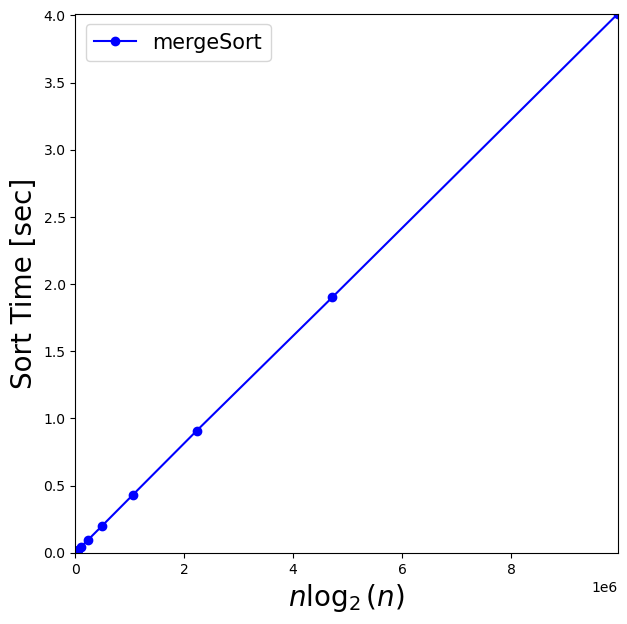

In [8]:
# Plot mergesort times
start = 10
N = 10
mergeTimes = testMergeTimes(mergeSort, start, N)

x = np.linspace(start, start+(N-1), N)
nlogn = (x)*2**(x)

plt.figure(figsize=(7, 7))
plt.plot(nlogn, mergeTimes,
        marker = 'o', 
        color = 'b', 
        mfc = 'b', 
        label = 'mergeSort')

plt.xlim(0, max(nlogn))
plt.ylim(0, max(mergeTimes))
plt.xlabel(r'$n \log_2(n)$', fontsize=20)
plt.ylabel(r'Sort Time [sec]', fontsize=20)
plt.legend(fontsize=15)
plt.show()

### Aside: Recursion vs. Iteration

It's one thing to say "program a recursive algorithm," and another for a computer to actually run it.  
So you should wonder how a computer (bunch of magnetic switches) physically handles functions that call themselves.  

They actually use a structure we have already mentioned: a [stack](https://www.cs.odu.edu/~zeil/cs361/latest/Public/recursionConversion/index.html).  
When any function is called, it goes on this stack in its own layer, logging all relevant information.  
When it sees a subfunction call, it pushes down the stack with the current running values to prepare for the new layer (current layer marked incomplete).  
In typical functions, the subfunction would just go on top of the stack, resolve, and then you can return to the main function.  
In recursive function, it would just keep making incomplete resolutions until you hit the base case and then work backwards.  

This leads to a more general point: all recursive functions are equivalent to an iterative one (i.e. a loop) and vice versa.  
There are theoretical statements that formalize this (e.g. [Church-Turing thesis](https://en.wikipedia.org/wiki/Church%E2%80%93Turing_thesis)).  
But all I am saying is that in practice, any valid recursive function *is executed as an iterative one* via this stack.  

As far as coding, most iterative versions of recursive code actually have better performance because
1. There is usually a max stack size, so recursive functions cannot handle the largest inputs.  
To be fair, you can adjust it in Python with `sys`, but the iterative version also has less overhead (only one function call). 
1. Loops tend to be a bit faster.  

Below I have some demo code for calculating a factorial in both the recursive and iterative fashion.  
They do agree in all the tested values, but the recursive version cannot handle inputs larger than $2^{11} \approx 2000$ on my system (max depth error).  
The iterative version is also (slightly) faster, $\approx 820 \mu s \pm 6 \mu s$ versus $\approx 1.1 ms \pm 15 \mu s$ for the recursive version.  

The real upside to recursive code is that many problems are more easily expressed/solved with recursion.  
Mergesort at the top level only takes 4 lines of code (3 if you're stingy).  
If you were to make the iterative version of this (which I leave as an exercise), it will definitely take more than 4 lines.  
So if you can, go for iteration, but otherwise it is down to comfort. 

In [9]:
# Demo of recursive and iterative factorial function
def factorial_1(n):
    if n < 0:
        raise ValueError("input must be non-negative int") #!
    if n == 0:
        return 1
    return n*factorial_1(n-1)

def factorial_2(n):
    assert n >= 0, "input must be non-negative int" #!
    out = 1
    for i in range(1, n+1):
        out *= i
    return out  

# Testing code
for i in range(0, 15):
    print(
    '%2i'%(i), 
    (factorial_1(i) == factorial_2(i)), 
    '%12i'%(factorial_1(i))
    )

 0 True            1
 1 True            1
 2 True            2
 3 True            6
 4 True           24
 5 True          120
 6 True          720
 7 True         5040
 8 True        40320
 9 True       362880
10 True      3628800
11 True     39916800
12 True    479001600
13 True   6227020800
14 True  87178291200


In [10]:
%%timeit
a = factorial_1(2**11) # any larger runs into maxdepth error on my system config

1.08 ms ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
%%timeit
a = factorial_2(2**11) # slows down greatly around 2**17

821 µs ± 3.68 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**Sidenote:** I have put guardrails on the input to be nonnegative, but the recursive one uses `raise` while the iterative one uses `assert`.  
There is a reason for that: [this MIT page](https://web.mit.edu/6.102/www/sp23/classes/11-recursive-data-types/recursion-and-iteration-review.html) shows `assert` will not always halt on recursive version, and hits `RecursionError: maximum depth reached`.   
This depends on your installation/optimization of Python (for my personal setup, the assert *does* halt in either case).  
You can also force it by requesting optimization when running Python code (the `-O` modifier in the command line) which will disable `assert` statements.  
As a matter of practice, `assert` should be used for debugging but `raise` should be for invalid inputs.  

Below I have left some exercise code for you to make an iterative version of mergesort.  
There is probably a version of it floating around on the internet, but I insist, **DO THIS ON YOUR OWN.**

In [12]:
# Exercise
def mergeSort_2(arr):
    # Iterative mergesort
    # You may reuse the merge function above
    
    ### YOUR CODE HERE
    
    pass
    ###
    

# Testing code
A = np.random.randint(100, size=10)

print("Original array:".rjust(15), A)
mergeSort_2(A)
print("Sorted array:".rjust(15), A)   
print("Is sorted:".rjust(15), all(A[i] <= A[i+1] for i in range(len(A) - 1)))

Original array: [57 93 79 52 57 58 43  4 34 29]
  Sorted array: [57 93 79 52 57 58 43  4 34 29]
     Is sorted: False


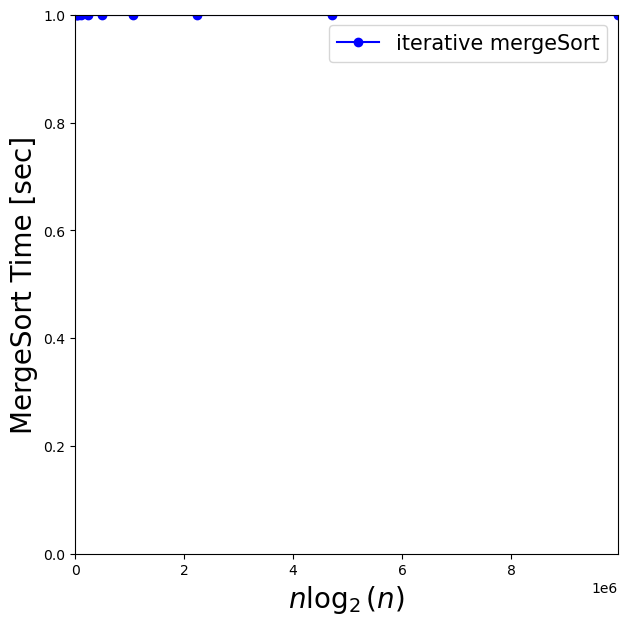

In [13]:
# Plot (iterative) mergesort times

# REPLACE THIS WITH OWN TEST TIMES
mergeTimes_2 = [1]*N

x = np.linspace(start, start+(N-1), N)
nlogn = (x)*2**(x)

plt.figure(figsize=(7, 7))
plt.plot(nlogn, mergeTimes_2,
        marker = 'o', 
        color = 'b', 
        mfc = 'b',
        label = 'iterative mergeSort')

plt.xlim(0, max(nlogn))
plt.ylim(0, max(mergeTimes_2))
plt.xlabel(r'$n \log_2(n)$', fontsize=20)
plt.ylabel(r'MergeSort Time [sec]', fontsize=20)
plt.legend(fontsize=15)
plt.show()

## Quicksort

**Quicksort** is a divide-and-conquer sorting algorithm that, as the name suggests, should be quick (on average).  
Whereas mergesort did this by splitting and merging (needing $O(n)$ auxiliary space), quicksort instead uses pivots and swaps. 

Basic idea:
1. Pick an element (for simplicity, try the last) as a pivot point.
1. Move all items larger/smaller than it to the right/left. 
1. By construction, the pivot element is now in the correct final position. 
1. The subarrays to either side are not sorted, so recursively pivot on the subarrays. 
1. Keep pivoting until you reach the base case (still a 1 element list). 

Below I have left code translated from Cormen to demonstrate quicksort.


In [14]:
def partition(A, p, r):
    # Direct translation of Cormen page 184
    
    # First select rightmost element as pivot value 
    pivot = A[r]   # x in Cormen, but there's already too many 1-letter variables
    i = p - 1      # highest index of low-subarray
    
    # Move all elements smaller than the pivot to the low-subarray
    for j in range(p, r):
        if (A[j] <= pivot):           # A[j] should be in the low-subarray (left)
            i += 1                    # Allocate more indices to the low-subarray
            A[i], A[j] = A[j], A[i]   # Swap the item in this newest spot with the low value you found
    
    # Swap pivot position with right end of low-subarray
    A[i+1], A[r] = A[r], A[i+1]
    return i+1 # new pivot position

def quickSort(A, p, r): 
    # Recursive quicksort
    if (p < r):
        q = partition(A, p, r)
        quickSort(A, p, q-1)
        quickSort(A, q+1, r)
        
# Testing code
A = np.random.randint(100, size=10)
n = len(A)

print("Original array:".rjust(15), A)
quickSort(A, 0, n-1)
print("Sorted array:".rjust(15), A)   
print("Is sorted:".rjust(15), all(A[i] <= A[i+1] for i in range(len(A) - 1)))


Original array: [ 6 94 26 81 81 90 53 87 69 82]
  Sorted array: [ 6 26 53 69 81 81 82 87 90 94]
     Is sorted: True


### Quicksort Time Complexity

The best case is if we happen to pivot around the median.  
> Unsorted subarrays are equal in size.  
> Associated recursion tree height is a binary tree of height $\log(n)$.

The worst case is if we happen to pick the end points. 
> Only one subarray is ever formed (maximally unbalanced).  
> Associated recursion tree has is a max height tree (height $n-1$).

<img src="img/06-08_qs.png" style="width: 50em" />

As in mergesort, effort per level is O(n), and total effort is multiplied by tree height:
> Best case: $O(n log(n))$  
> Worst case: $O(n^2)$

How would one evaluate the average case?  
Well, if a point is at least close to the median ("good"), it should be close to splitting the array evenly.  
Conversely, points close to the endpoints ("bad") should split the array lopsidedly.  
We have an equal probability of randomly selecting a good or bad pivot.  

In the worst case of a bad pivot, the pivot effectively doesn't split the array, and can be ignored.  
In the worst case of a good pivot, the array is split with a larger array of $(3/4)\times n$.  
For this degree of splitting, the array is atomized in $N_g = \log_{4/3}(n)$, or equivalently $N_g = \log(4/3)\log(n)$.  
Note that numerically, $\log(4/3) \approx 1/2$, so even if we need to draw $2\times N_g$ pivots to get $N_g$ good ones, the factors will cancel out.  
Therefore average performance is still approximately $O(n log(n))$.

A way to think about it: while "bad" pivots do effectively nothing, the reduction from a "good" pivot is so extreme that it dominates the scaling, and we are equally likely to get either in any given pass. 


### Quicksort: Relative Performance
The name "quicksort" might be confusing given that  
1. Its average time is still $O(n\log(n))$
1. Its worst case time is worse $O(n^2)$ 

On the face of it, it seems worse than heapsort and mergesort.  
In practice, the scaling is the same but the scaling *constant* can be smaller because of the simpler inner operations and better locality. 

Below I have some demo code to compare mergesort to quicksort

In [15]:
# Test for time of mergeSort

def testMsQsTimes(merger, qsorter, start, N):
    msTimes = np.zeros(N)
    qsTimes = np.zeros(N)
    for i in range(N):
        A = np.random.randint(2**(i+start+5), size=2**(i+start))
        B = A.copy()
        
        t_start = time.time()
        merger(A, 0, len(A)-1)
        t_end = time.time()
        msTimes[i] = t_end - t_start
        
        t_start = time.time()
        qsorter(B, 0, len(B)-1)
        t_end = time.time()
        qsTimes[i] = t_end - t_start
        
    return msTimes, qsTimes

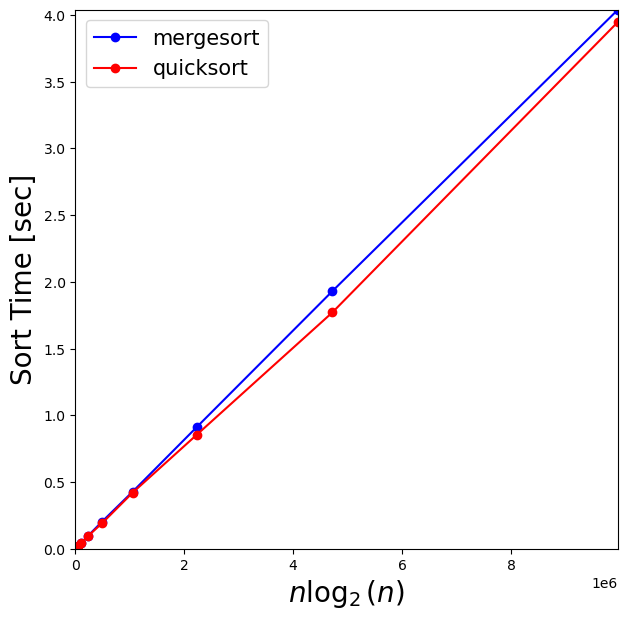

In [16]:
start = 10
N = 10
msTimes, qsTimes = testMsQsTimes(mergeSort, quickSort, start, N)

x = np.linspace(start, start+(N-1), N)
nlogn = (x)*2**(x)

plt.figure(figsize=(7, 7))
plt.plot(nlogn, msTimes,
        marker = 'o', 
        color = 'b', 
        mfc = 'b', 
        label = 'mergesort')

plt.plot(nlogn, qsTimes,
        marker = 'o', 
        color = 'r', 
        mfc = 'r',
        label = 'quicksort')

plt.xlim(0, max(nlogn))
plt.ylim(0, max(max(msTimes), max(qsTimes)))
plt.xlabel(r'$n \log_2(n)$', fontsize=20)
plt.ylabel(r'Sort Time [sec]', fontsize=20)
plt.legend(fontsize=15)
plt.show()

I guess it's marginally faster in this scenario, and it is $O(n\log(n))$ as we expected.  
But it would not surprise me if it starts to slow down for different setups and input sizes.  

Remember that most of the books that work on this are intended for use with **C** which have more direct access to memory.  
Python is designed by people who "read Knuth so that you don't have to," and a lot of the internal operations are handled.  
As such, I don't really expect the speed up from cache performance to really come through in our version of quicksort.  

Just to hammer the point and come full circle, we compare our mergesort to the native Python sort in the cell below.  
The native sorting on lists (which is basically a hybrid merge-insertion sort) consistently does over an order of magnitude faster than ours.  

The lesson is clear: if you have a choice of algorithms with good scaling, the implementation details start to matter because they control the scaling coefficient.  
In that regard, a lower-level implementation will almost always beat Python code by a lot.  

In [32]:
x = 17
A = list(np.random.randint(100, size=2**x))
B = A.copy()

t_start = time.time()
mergeSort(A, 0, len(A)-1)
t_end = time.time()
dt1 = t_end - t_start

t_start = time.time()
B.sort()
t_end = time.time()
dt2 = t_end - t_start

print("Size:".rjust(20), 2**x)
print("mergeSort time:".rjust(20), dt1)
print("native sort time:".rjust(20), dt2)
print("native speedup:".rjust(20), dt1/dt2)

               Size: 131072
     mergeSort time: 0.6569793224334717
   native sort time: 0.02600717544555664
     native speedup: 25.26146385288132


# Master Theorem

Recall that for the different sorting algorithms, we found the time complexity using tree arguments.  
This works, but we should be lazy and find a more general way to do this.  
Fortunately, someone did the heavy lifting and found it for us in the form of **Master theorem**.  
[Here](https://www.cs.cornell.edu/courses/cs3110/2012sp/lectures/lec20-master/mm-proof.pdf) is a proof of the theorem; it's not particularly hard, though it is tedious and requires knowledge of series (again). 

> Suppose we have a recurrence relation for the complexity as $$T(n) = aT\left(\frac{n}{b}\right) + f(n)$$
> Then defining $c_{crit} = \log_{b}(a) = \log(a)/\log(b)$, the complexity can be found in 1 of 3 cases.  
**Case 1:** $f(n) = O(n^c), \quad c<c_{crit} \quad \implies  \quad T(n) = \Theta(n^{c_{crit}})$   
**Case 2:** $f(n) = \Theta(n^c), \quad c=c_{crit} \quad \implies  \quad T(n) = \Theta(n^{c_{crit}}\log(n))$  
**Case 3:** $\left(f(n) = \Omega(n^c), \quad c>c_{crit}\right) \text{ AND } \left(\exists d \text{ | } af(n/b) \leq df(n)\right) \quad \implies  \quad T(n) = \Theta(f(n))$

### Example: Mergesort

From the mergesort pseudocode

    DEF mergeSort(arr, start, end): 
        mid  = start + (end - start) // 2
        mergeSort(arr, start, mid)
        mergeSort(arr, mid + 1, end)
        MERGE(arr, start, mid, end)

if the total time for the top `mergeSort` is denoted $T(n)$, the two recursive calls each contribute $T(n/2)$ while `MERGE` we argued is $O(n)$.  
The recurrence relation is thus $$T(n) = 2T\left(\frac{n}{2} \right) + O(n)$$ 
We can identify $a\rightarrow 2$, $b\rightarrow 2$, $c_{crit} = 1$, and $f(n) = O(n)$.  
By inspection, this is case 2, so $$T(n) = \Theta(n^{c_{crit}}\log(n)) = \Theta(n\log(n)) $$
which is what we got from our original analysis. 

### Interpretation
**Terms**  
- $a>0$ is the *branching factor* which is the number of subproblems a level is split into.  
- $b>1$ is the *shrinking factor* which is a measure of how much the subproblem reduces the size of the original.  
- $c_{crit} = \log(a)/\log(b)$ is the *critical exponent* which is a measure of the rate of change in work per level.  
When it's 1, as it was for the previous algorithms, the amount of work done per level is constant.  
- $f(n)$ is the *driving function* which is the work done splitting or merging levels.  
In mergesort, this was literally the work done by the `merge` function.
- $n^{c_{crit}}$ is the *watershed function* which defines the 3 different cases. 
- $\left(\exists d \text{ | } af(n/b) \leq df(n)\right)$ is the *regularity* or *smoothness condition* that is necessary to bound case 3 functions. 

The 3 cases can be then be understood as the balance of work/level versus tree structure. 

**Case 1:** $f(n) = O(n^c), \quad c<c_{crit}$

Splitting/merging is relatively "easy" but there are "many" branches to deal with.  
Associated tree is leaf-heavy, and lowest-level work dominates.  
Only the tree structure contributes to the time complexity $\implies T(n) = \Theta(n^{c_{crit}})$

**Case 2:** $f(n) = \Theta(n^c), \quad c=c_{crit}$

Splitting/merging is comparable with number of branches.  
Work per level, which is exactly $O(n^{c_{crit}}$, contributes equally. 
$\log(n)$ term comes from number of levels $\implies T(n) = \Theta(n^{c_{crit}}\log(n))$

**Case 3:** $f(n) = \Omega(n^c), \quad c>c_{crit}$

Splitting/merging is "hard," even if there are "few" branches.  
Now we also need to impose the regularity condition to be bound *at all*.  
Associated tree is root-heavy, and work at top-level dominates, i.e. work merging/splitting just the root node $\implies T(n) = \Theta(f(n))$


### Note on Case 2

In Cormen, case 2 is written in more general form
>**Case 2:** $f(n) = \Theta(n^c\log^k(n)), \quad c=c_{crit} \quad \implies  \quad T(n) = \Theta(n^{c_{crit}}\log^{k+1}(n))$  

where (evidently) the log terms do not meaningfully contribute to the dominance, and we see that the Skiena version is the special case $k=0$.  
The main factor is still the splitting term $f(n)$ which now has a log term.  
The tree structure still provides a multiplicative factor of $log(n)$, hence the +1 in the log's exponent. 

I am currently assuming that Skiena's book omits the $\log^k$ term for pedagogy/symmetry between the 3 cases.  